In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os
import cv2

In [ ]:
images_fp="/content/drive/MyDrive/images/"
image_names=[]

In [ ]:
image_names=[os.path.basename(file) for file in glob.glob(os.path.join(images_fp,"*.jpg"))]

In [ ]:
image_names

In [ ]:
labels=[' '.join(name.split('_')[:-1:])for name in image_names]

In [ ]:
labels

In [ ]:
def label_encode(label):
   if label == "Abyssinian": return 0
   elif label =="Bengal":return 1
   elif label =="Birman":return 2
   elif label =="Bombay":return 3
   elif label =="British Shorthair":return 4
   elif label =="Egyptian Mau":return 5
   elif label == "american bulldog":return 6
   elif label =="american pit bull terrier":return 7
   elif label =="basset hound":return 8
   elif label =="beagle":return 9
   elif label =="boxer":return 10
   elif label =="chihuahua":return 11
   elif label =="english cocker spaniel":return 12
   elif label =="english setter":return 13
   elif label =="german shorthaired":return 14
   elif label =="great pyrenees":return 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
features=[]
labels=[]
image_size=(224,224)
for name in image_names:
  label=' '.join(name.split('_')[:-1:])
  label_encoded=label_encode(label)
  if label_encoded !=None:
    img=load_img(os.path.join(images_fp,name))
    img=tf.image.resize_with_pad(img_to_array(img,dtype='uint8'),*image_size).numpy().astype('uint8')
    image = np.array(img)
    features.append(image)
    labels.append(label_encoded)

In [ ]:
features

In [ ]:
labels

In [ ]:
features_array = np.array(features)
labels_array=np.array(labels)
labels_one_hot = pd.get_dummies(labels_array)

In [ ]:
labels_one_hot

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features_array,labels_one_hot,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [ ]:
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip,RandomRotation,Dense,Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
data_augmentation=Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0.2)])

In [ ]:
prediction_layer=Dense(16,activation='softmax')

In [ ]:
resnet_model=ResNet50(include_top=False,pooling='avg',weights='imagenet')
resnet_model.trai

In [ ]:
resnet_model.trainable=False
inputs=Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=pp_i(x)
x=resnet_model(x,training=False)
x=Dropout(0.2)(x)
outputs=prediction_layer(x)
model=Model(inputs,outputs)

In [ ]:
model.compile(optimizer=Adam(),loss=CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model_history = model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
60/60 [==============================] - 547s 9s/step - loss: 1.6803 - accuracy: 0.4875 - val_loss: 0.6359 - val_accuracy: 0.8062
Epoch 2/10
60/60 [==============================] - 549s 9s/step - loss: 0.7668 - accuracy: 0.7531 - val_loss: 0.3804 - val_accuracy: 0.8875
Epoch 3/10
60/60 [==============================] - 552s 9s/step - loss: 0.6072 - accuracy: 0.8047 - val_loss: 0.3154 - val_accuracy: 0.9000
Epoch 4/10
60/60 [==============================] - 547s 9s/step - loss: 0.4914 - accuracy: 0.8432 - val_loss: 0.2923 - val_accuracy: 0.9047
Epoch 5/10
60/60 [==============================] - 542s 9s/step - loss: 0.4392 - accuracy: 0.8521 - val_loss: 0.2700 - val_accuracy: 0.9078
Epoch 6/10
60/60 [==============================] - 541s 9s/step - loss: 0.3954 - accuracy: 0.8667 - val_loss: 0.2511 - val_accuracy: 0.9109
Epoch 7/10
60/60 [==============================] - 545s 9s/step - loss: 0.3654 - accuracy: 0.8786 - val_loss: 0.2765 - val_accuracy: 0.9109
Epoch 8/10
60

In [ ]:
acc = model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss= model_history.history['loss']
val_loss=model_history.history['val_loss']

In [ ]:
epochs_range=range(10)

Text(0.5, 1.0, 'Training and Validation loss')

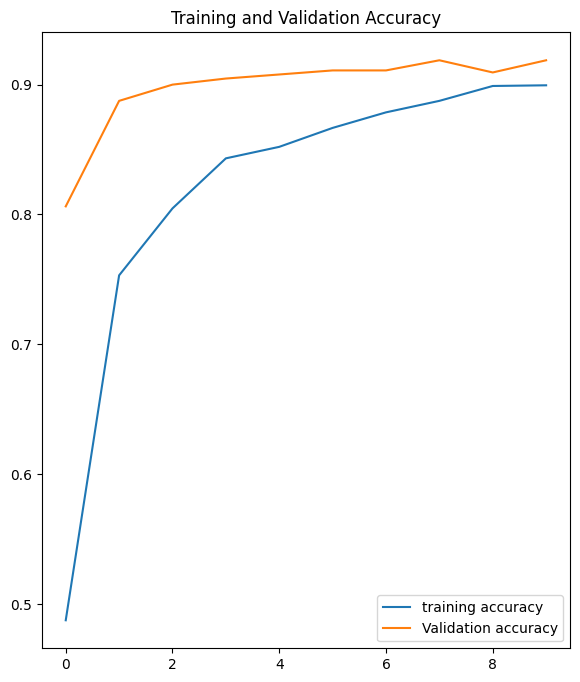

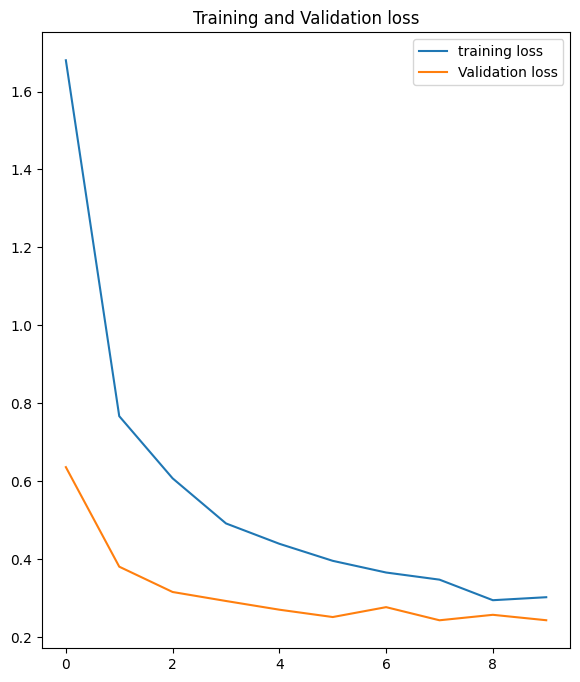

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title("Training and Validation loss")

In [ ]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 131s 6s/step - loss: 0.2732 - accuracy: 0.9125


[0.2732393145561218, 0.9125000238418579]

In [ ]:
y_pred=model.predict(x_test)

20/20 [==============================] - 128s 6s/step


In [ ]:
y_pred

array([[7.3583368e-07, 2.0215716e-03, 3.4392453e-04, ..., 1.3667011e-01,
        2.5594706e-04, 1.2782436e-02],
       [9.5429277e-07, 8.4020710e-04, 4.2657335e-05, ..., 2.7363500e-01,
        1.6443528e-02, 1.0193019e-04],
       [5.4152883e-03, 2.0559586e-03, 2.2787323e-02, ..., 2.5740040e-03,
        2.5757216e-02, 4.4657279e-02],
       ...,
       [4.6312163e-08, 1.4638535e-07, 2.1327115e-07, ..., 6.8086585e-05,
        4.4555705e-02, 1.1171119e-07],
       [3.9566427e-08, 1.6118610e-08, 3.6511338e-07, ..., 4.6112862e-07,
        7.6321550e-05, 3.0717747e-06],
       [3.5549624e-07, 1.4804443e-05, 8.7149265e-06, ..., 3.2598862e-06,
        1.7622636e-04, 3.6410800e-06]], dtype=float32)